In [4]:
import pandas as pd
import os

# Define the path to your data folder
folder_path = 'C:\\Users\\dell\\Desktop\\giga_hiring_challenge\\mobility_4_test'  # replace with your folder path

# List of day files to load
days = range(1, 8)  # Day 1 to Day 7

# Initialize an empty dictionary to store dataframes for each day
data = {}

# Load the data for each day and each time slot (0000, 0800, 1600)
for day in days:
    day_files = ['day{}_0000.csv'.format(day), 'day{}_0800.csv'.format(day), 'day{}_1600.csv'.format(day)]
    day_data = []
    for file in day_files:
        file_path = os.path.join(folder_path, file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            day_data.append(df)
    data[day] = day_data

# Test if data is loaded correctly
print("Data loaded for days 1-7:")
print(data.keys())  # Prints out the days for which data has been loaded

# Check the structure of the loaded data
for day in data:
    print(f"\nDay {day} data structure:")
    for idx, df in enumerate(data[day]):
        print(f"Time Slot {['0000', '0800', '1600'][idx]}:")
        print(df.head())  # Show the first few rows of each dataframe to verify the data



Data loaded for days 1-7:
dict_keys([1, 2, 3, 4, 5, 6, 7])

Day 1 data structure:
Time Slot 0000:
   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   7515                14.000000                     30   
1           1   7517                11.000000                     24   
2           2   7519                16.666667                     45   
3           3   7520                14.000000                     31   
4           4   7542                13.000000                     38   

          x0        y0         x1        y1  
0  62.788086  8.425543  62.963867  8.425543  
1  62.788086  8.425543  63.227540  8.256863  
2  62.788086  8.425543  63.315430  8.172468  
3  62.788086  8.425543  63.491210  8.425543  
4  62.788086  9.350634  63.139650  9.350634  
Time Slot 0800:
   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   8271                32.666667                     87   
1           1   8272             

In [5]:
# Check for missing data in the Baseline and Crisis columns
for day in data:
    for idx, df in enumerate(data[day]):
        missing_data = df[['Baseline: People Moving', 'Crisis: People Moving']].isnull().sum()
        print(f"Day {day} - Time Slot {['0000', '0800', '1600'][idx]} - Missing Data:")
        print(missing_data)
        print("-" * 50)

Day 1 - Time Slot 0000 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 1 - Time Slot 0800 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 1 - Time Slot 1600 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 2 - Time Slot 0000 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 2 - Time Slot 0800 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 2 - Time Slot 1600 - Missing Data:
Baseline: People Moving    0
Crisis: People Moving      0
dtype: int64
--------------------------------------------------
Day 3 - Time Slot 0000 - Missing D

In [6]:
# Check for basic statistics to spot any inconsistencies in the data
for day in data:
    for idx, df in enumerate(data[day]):
        print(f"Day {day} - Time Slot {['0000', '0800', '1600'][idx]} - Summary Statistics:")
        print(df[['Baseline: People Moving', 'Crisis: People Moving']].describe())
        print("-" * 50)


Day 1 - Time Slot 0000 - Summary Statistics:
       Baseline: People Moving  Crisis: People Moving
count               876.000000             876.000000
mean                 30.206830              84.835616
std                  47.427220             138.048846
min                  10.000000              10.000000
25%                  13.000000              35.000000
50%                  17.666667              50.000000
75%                  29.666667              84.000000
max                 695.266667            2045.000000
--------------------------------------------------
Day 1 - Time Slot 0800 - Summary Statistics:
       Baseline: People Moving  Crisis: People Moving
count              1018.000000            1018.000000
mean                 29.712045              83.262279
std                  48.636431             142.083509
min                  10.200000              10.000000
25%                  13.000000              34.250000
50%                  17.666667              49.00

In [7]:
print(df[['Baseline: People Moving', 'Crisis: People Moving']].head())


   Baseline: People Moving  Crisis: People Moving
0                15.666667                     28
1                11.000000                     11
2                11.000000                     20
3                10.333333                     10
4                12.000000                     10


   index  Baseline: People Moving  Crisis: People Moving
0   7515                14.000000                     30
1   7517                11.000000                     24
2   7519                16.666667                     45
3   7520                14.000000                     31
4   7542                13.000000                     38


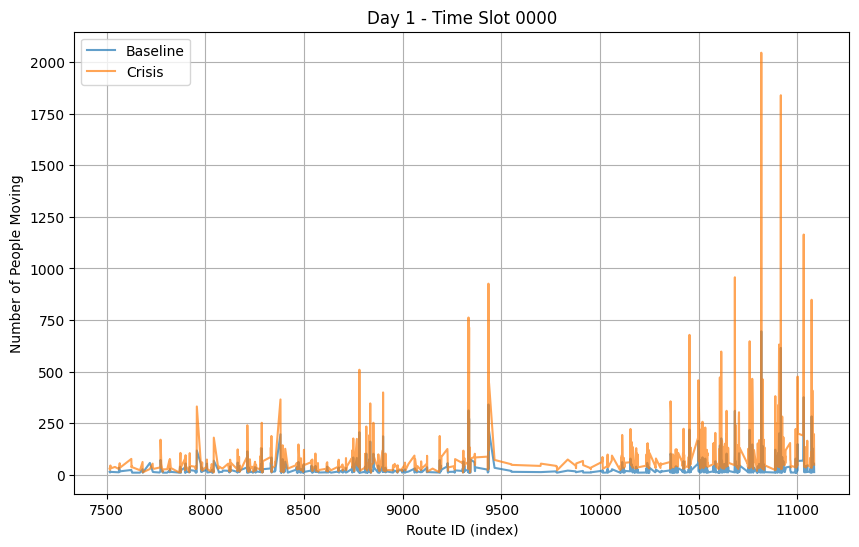

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to your data folder (update with the actual folder path)
folder_path = 'C:\\Users\\dell\\Desktop\\giga_hiring_challenge\\mobility_4_test'

# Load the specific file for Day 1 and Time Slot 0000
file_path = os.path.join(folder_path, 'day1_0000.csv')

# Read the data
df = pd.read_csv(file_path)

# Verify the data
print(df[['index', 'Baseline: People Moving', 'Crisis: People Moving']].head())  # Check the first few rows to verify values

# Plot the baseline vs crisis data for Day 1 Time Slot 0000
plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['Baseline: People Moving'], label='Baseline', alpha=0.7)
plt.plot(df['index'], df['Crisis: People Moving'], label='Crisis', alpha=0.7)
plt.title("Day 1 - Time Slot 0000")
plt.xlabel('Route ID (index)')
plt.ylabel('Number of People Moving')
plt.legend()
plt.grid(True)
plt.show()


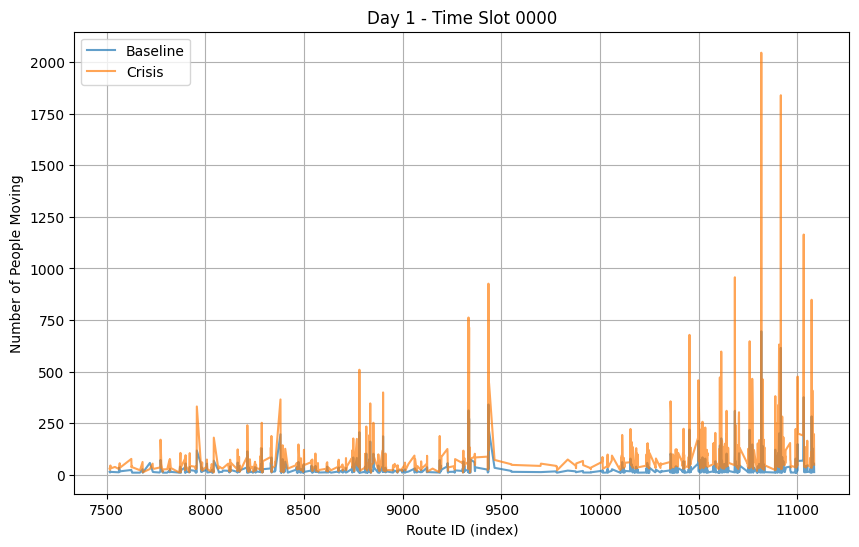

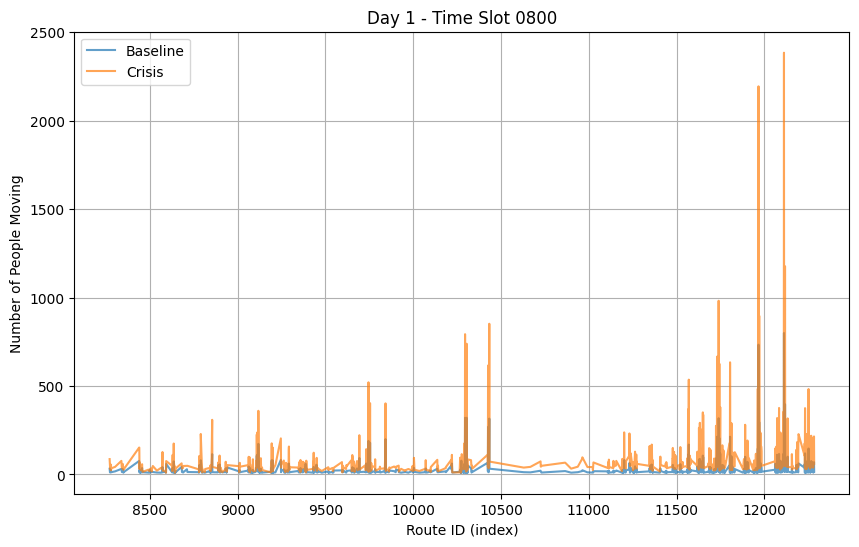

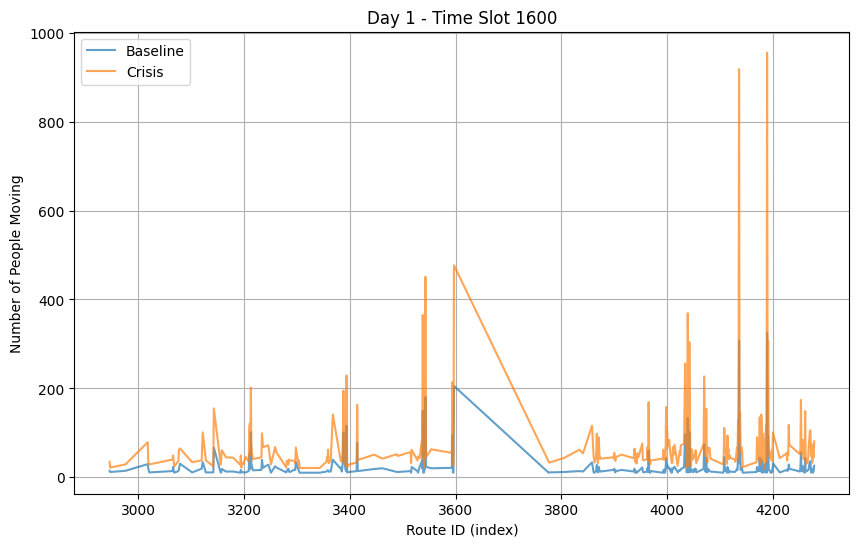

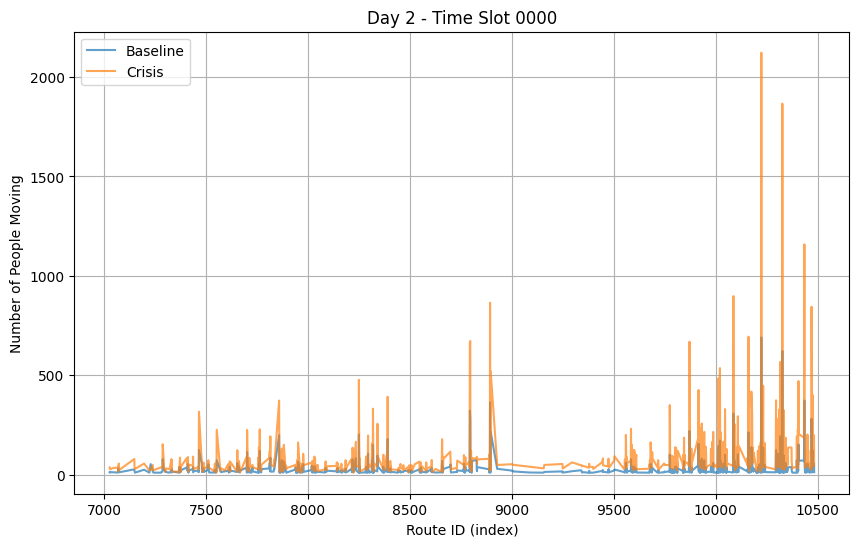

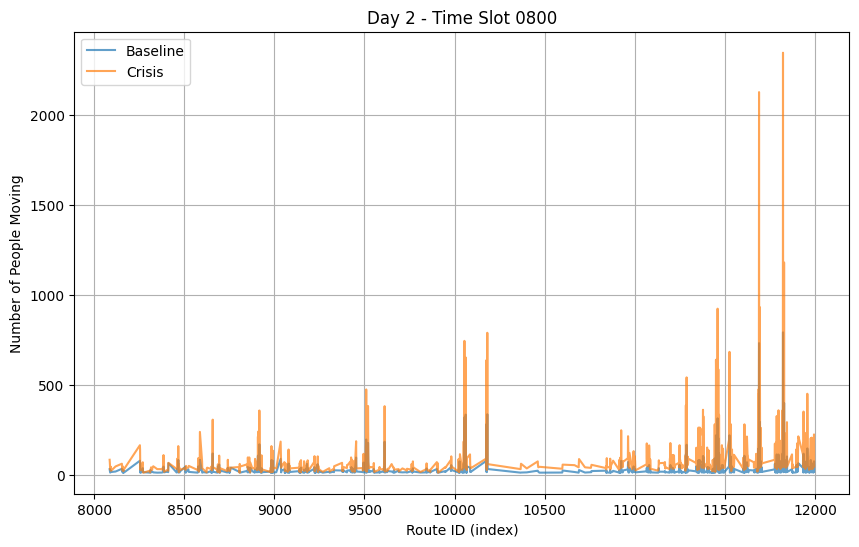

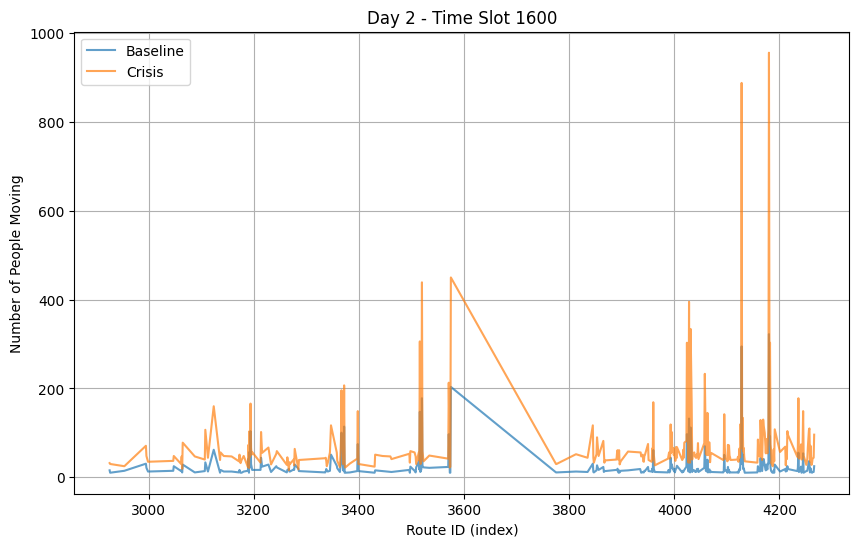

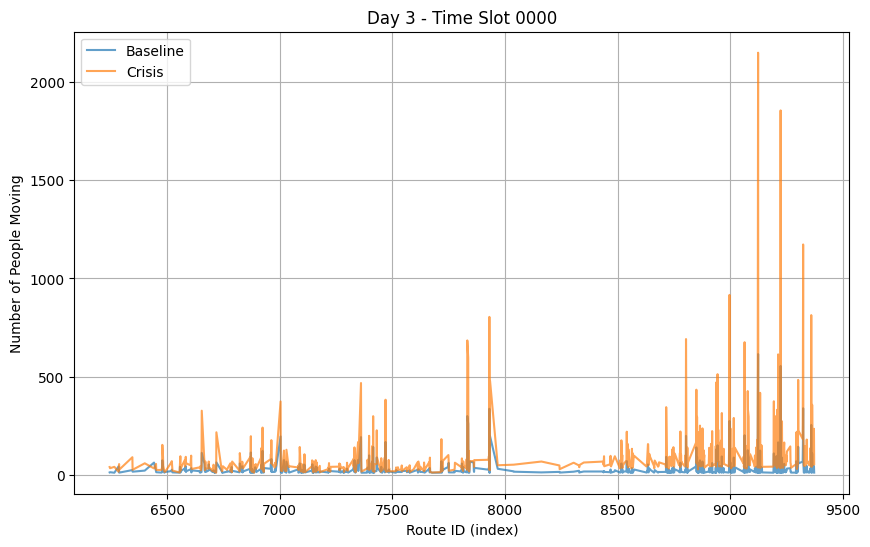

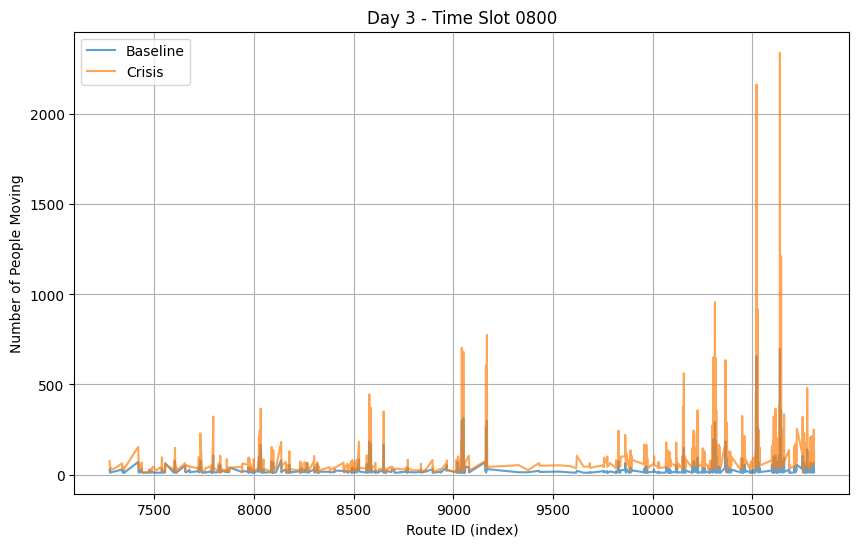

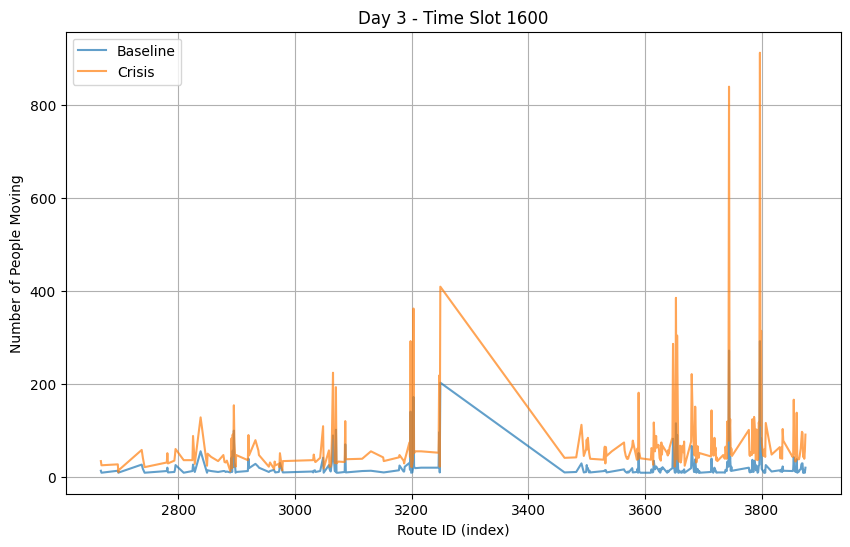

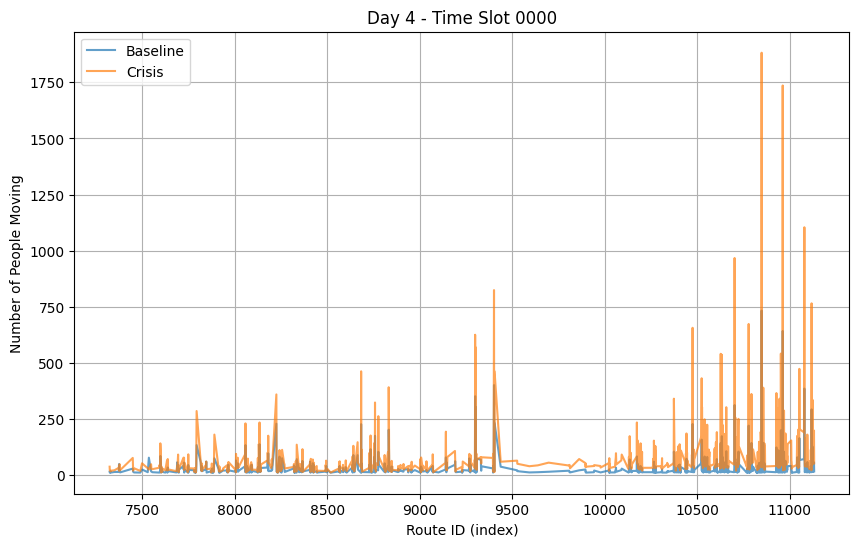

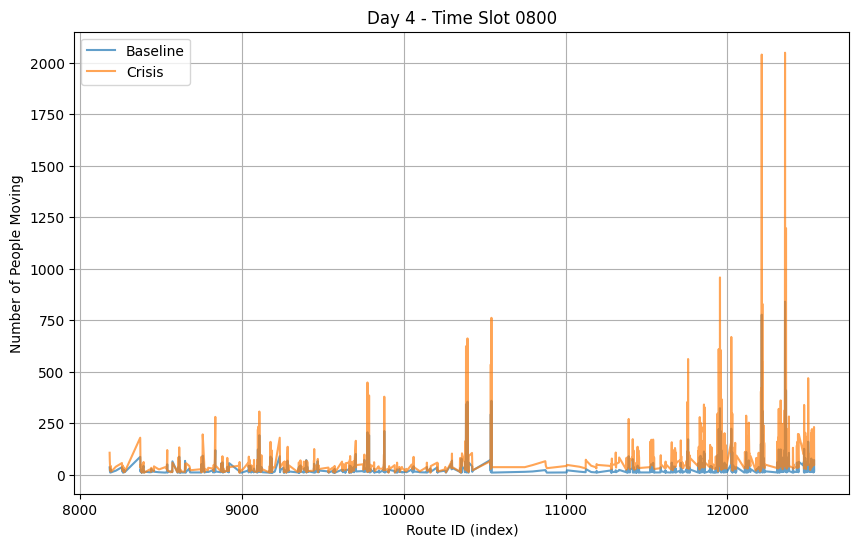

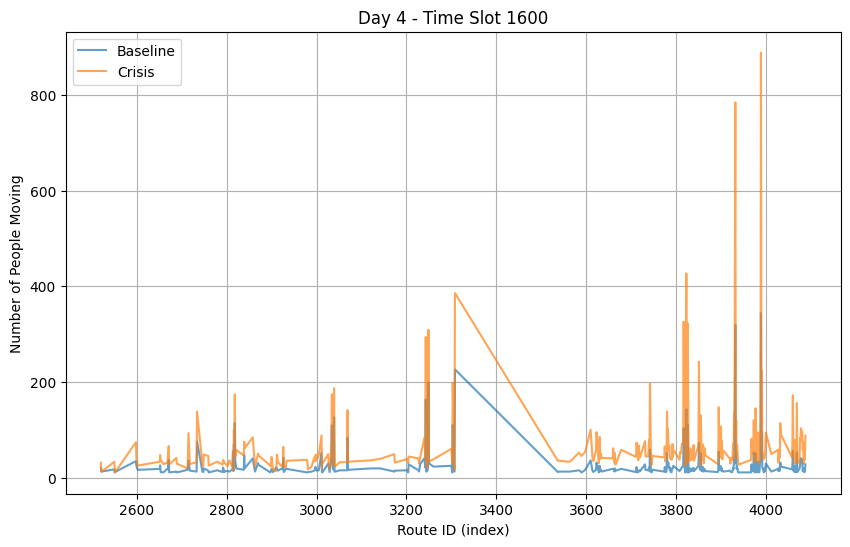

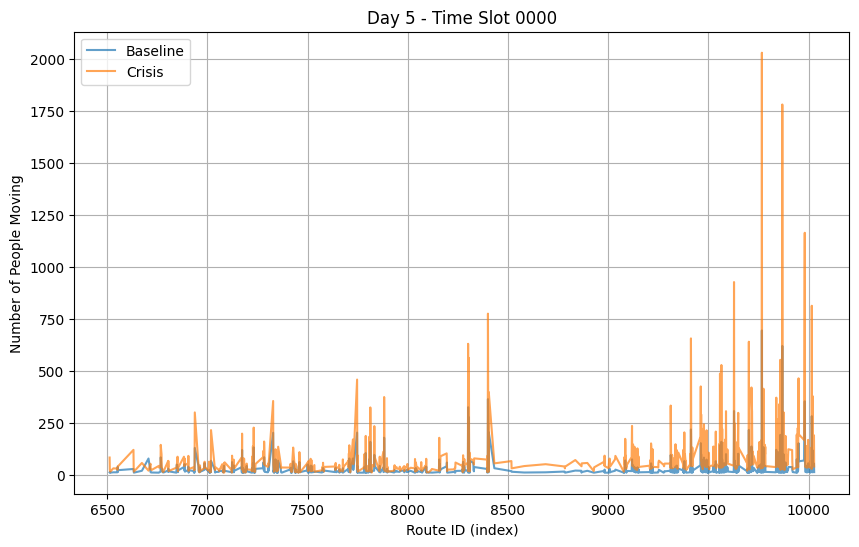

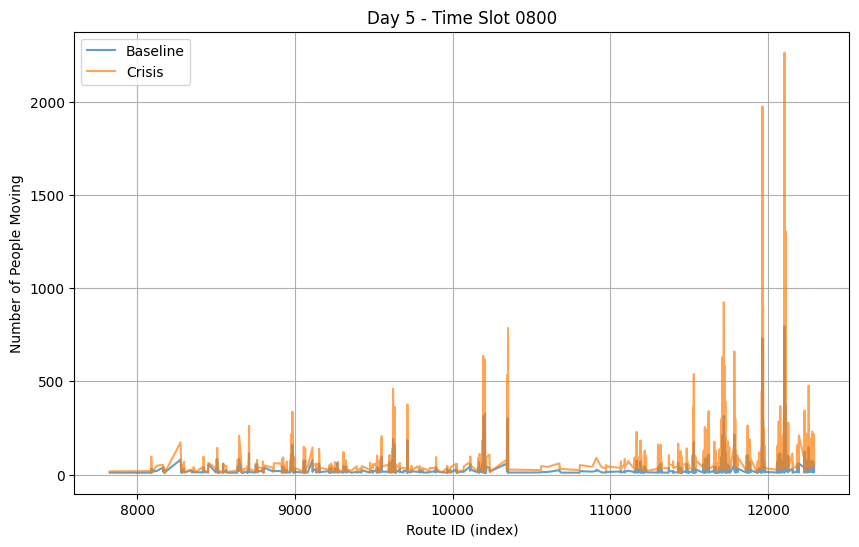

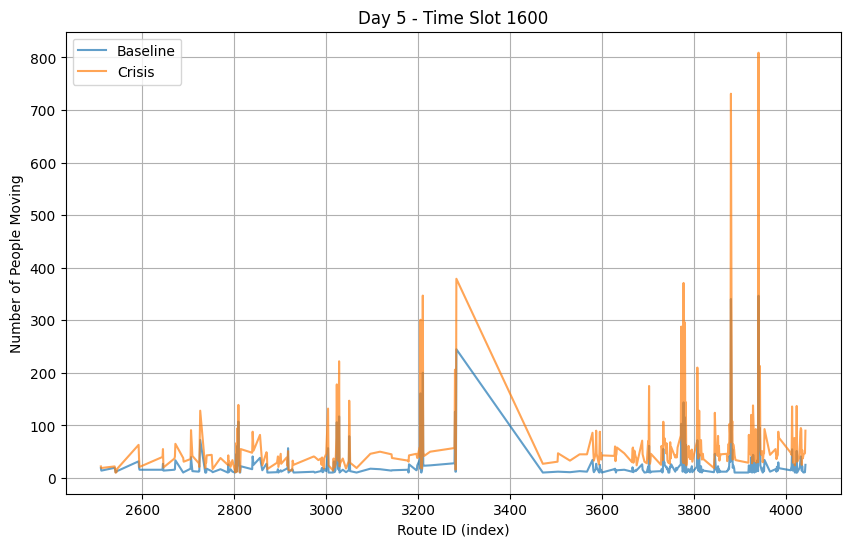

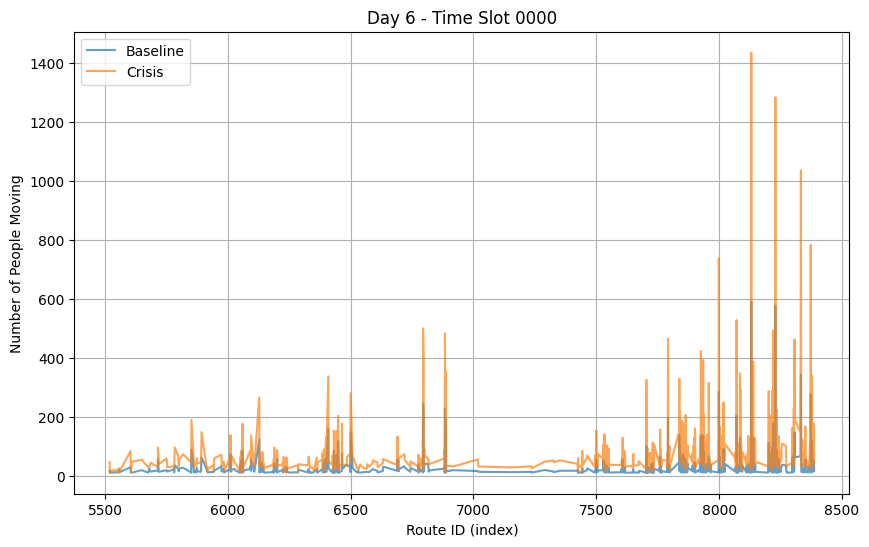

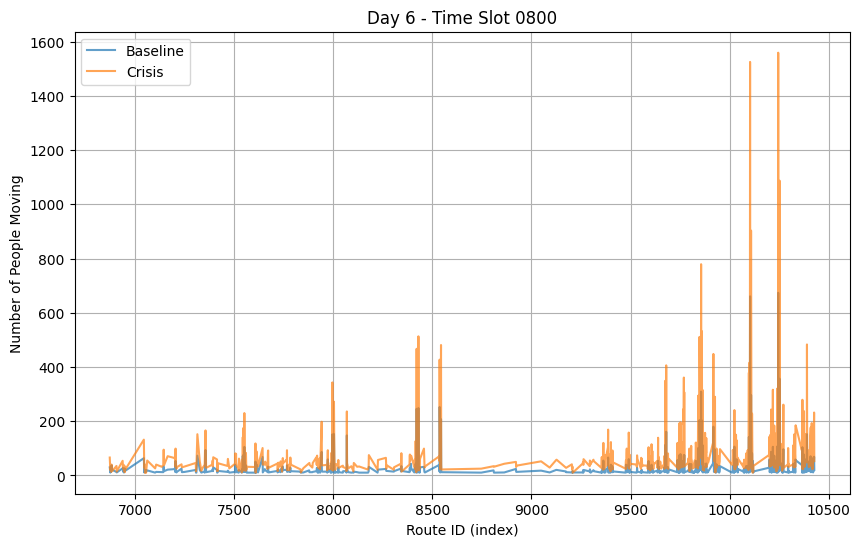

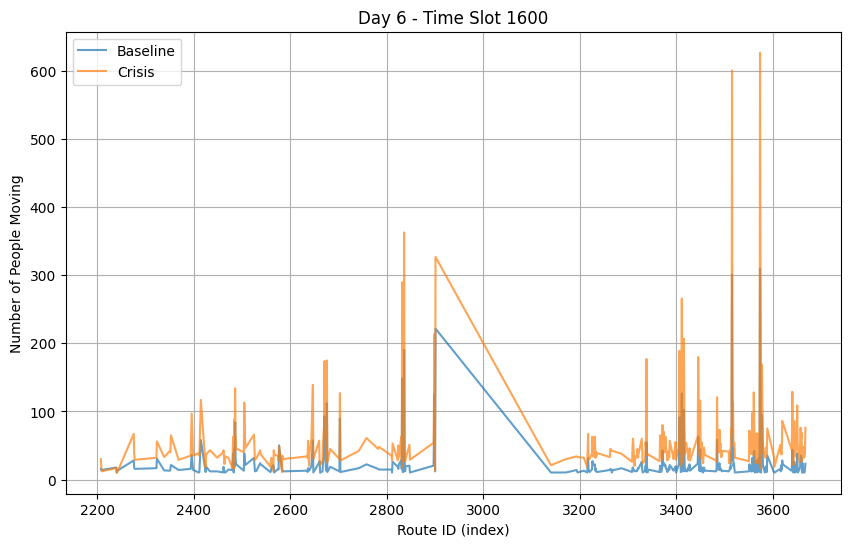

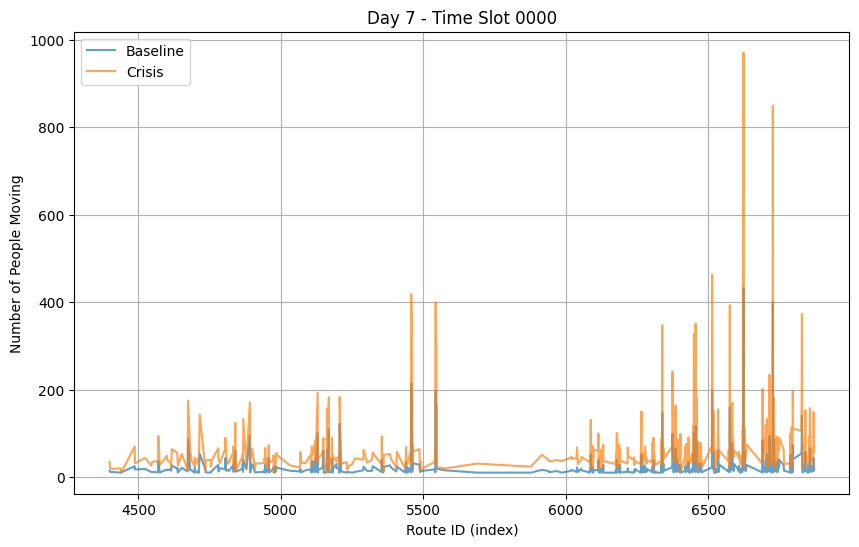

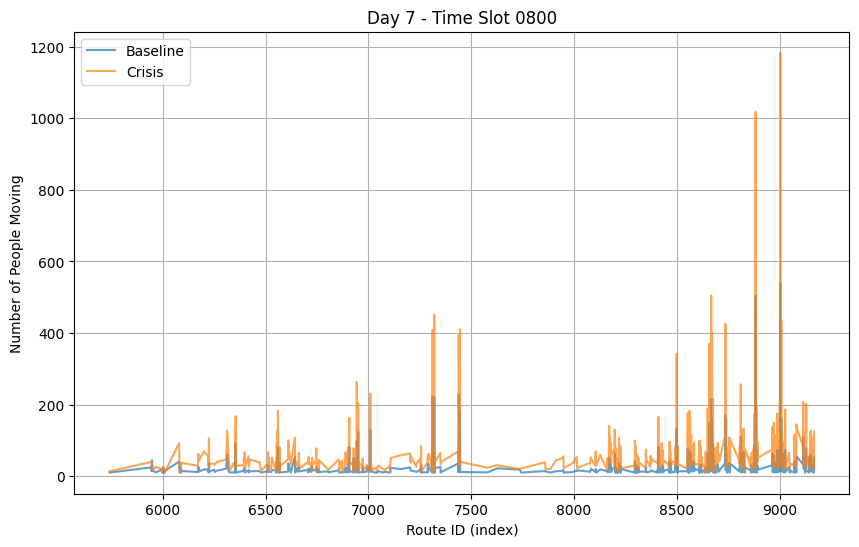

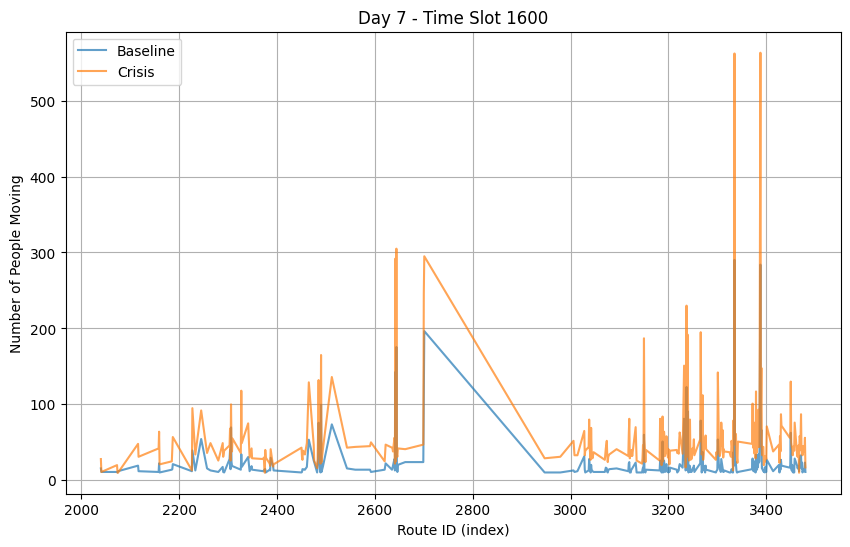

In [10]:
import matplotlib.pyplot as plt

# Plot baseline vs crisis for each day and time slot
for day in data:
    for idx, df in enumerate(data[day]):
        plt.figure(figsize=(10, 6))
        plt.plot(df['index'], df['Baseline: People Moving'], label='Baseline', alpha=0.7)
        plt.plot(df['index'], df['Crisis: People Moving'], label='Crisis', alpha=0.7)
        plt.title(f"Day {day} - Time Slot {['0000', '0800', '1600'][idx]}")
        plt.xlabel('Route ID (index)')
        plt.ylabel('Number of People Moving')
        plt.legend()
        plt.grid(True)
        plt.show()


In [22]:
# Loop through the dictionary to process each DataFrame
for day, dfs in data.items():
    for idx, df in enumerate(dfs):
        # Add the 'area_id' column to each DataFrame
        df['area_id'] = df.apply(lambda row: (row['x0'], row['y0'], row['x1'], row['y1']), axis=1)
        
        # Group the data by 'area_id' and calculate average Baseline and Crisis values
        area_data = df.groupby('area_id')[['Baseline: People Moving', 'Crisis: People Moving']].mean()

        # Calculate the absolute change in mobility
        area_data['Absolute Change'] = area_data['Crisis: People Moving'] - area_data['Baseline: People Moving']
        
        
        print(area_data[['Absolute Change']])

        
        def categorize_change(change):
            if change > 50:
                return 'High Increase'
            elif change > 0:
                return 'Moderate Increase'
            elif change < 0:
                return 'Reduction'
            else:
                return 'Stable'

        area_data['Mobility Category'] = area_data['Absolute Change'].apply(categorize_change)
        
        print(area_data[['Mobility Category']])


                                            Absolute Change
area_id                                                    
(62.788086, 8.425543, 62.963867, 8.425543)        16.000000
(62.788086, 8.425543, 63.22754, 8.256863)         13.000000
(62.788086, 8.425543, 63.31543, 8.172468)         28.333333
(62.788086, 8.425543, 63.49121, 8.425543)         17.000000
(62.788086, 9.350634, 63.13965, 9.350634)         25.000000
...                                                     ...
(65.86426, 12.591646, 65.86426, 12.50935)        327.066667
(65.86426, 12.591646, 65.86426, 12.673901)       133.133333
(65.86426, 12.673901, 65.77637, 12.673901)        39.333333
(65.86426, 12.673901, 65.86426, 12.591646)       141.800000
(65.86426, 12.756109, 65.86426, 12.673901)        36.000000

[876 rows x 1 columns]
                                            Mobility Category
area_id                                                      
(62.788086, 8.425543, 62.963867, 8.425543)  Moderate Increase
(62.788086

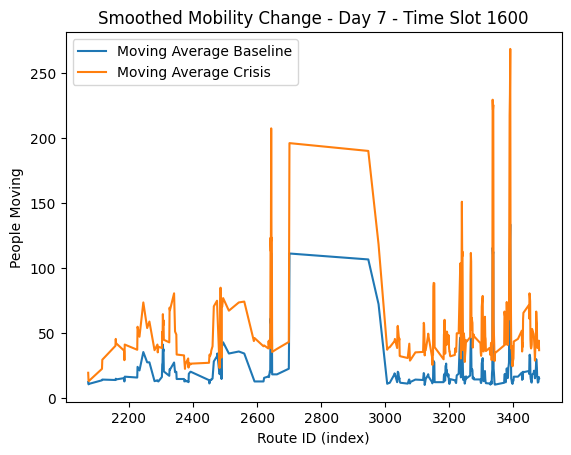

In [16]:
# Apply a moving average to smooth the data 
df['Moving Average Baseline'] = df['Baseline: People Moving'].rolling(window=3).mean()
df['Moving Average Crisis'] = df['Crisis: People Moving'].rolling(window=3).mean()


plt.plot(df['index'], df['Moving Average Baseline'], label='Moving Average Baseline')
plt.plot(df['index'], df['Moving Average Crisis'], label='Moving Average Crisis')
plt.xlabel('Route ID (index)')
plt.ylabel('People Moving')
plt.title(f"Smoothed Mobility Change - Day {day} - Time Slot {['0000', '0800', '1600'][idx]}")
plt.legend()
plt.show()


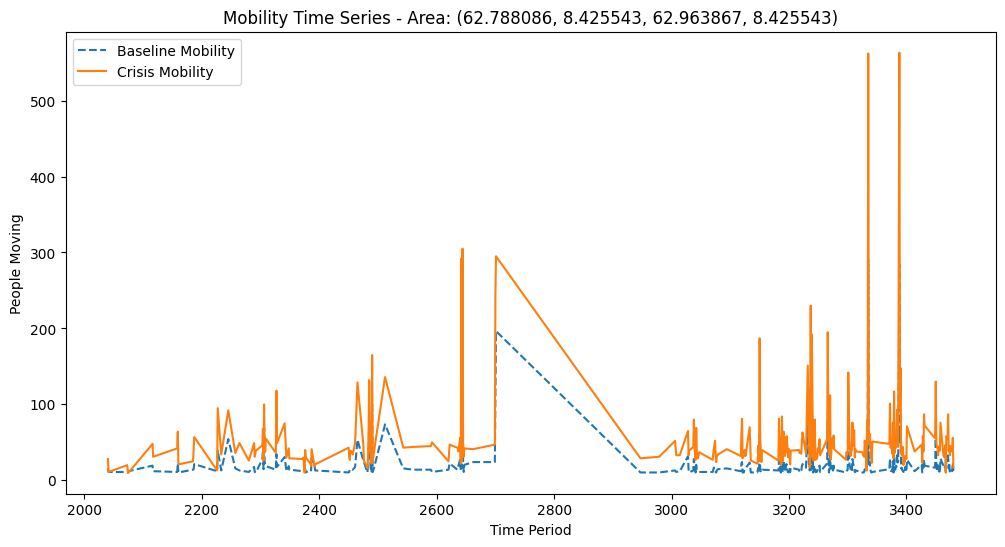

In [17]:
# Example of plotting mobility time series for a specific area ( first area_id in the dataset)
specific_area = area_data.iloc[0]  
plt.figure(figsize=(12, 6))
plt.plot(df['index'], df['Baseline: People Moving'], label='Baseline Mobility', linestyle='--')
plt.plot(df['index'], df['Crisis: People Moving'], label='Crisis Mobility', linestyle='-')
plt.xlabel('Time Period')
plt.ylabel('People Moving')
plt.title(f'Mobility Time Series - Area: {specific_area.name}')
plt.legend()
plt.show()


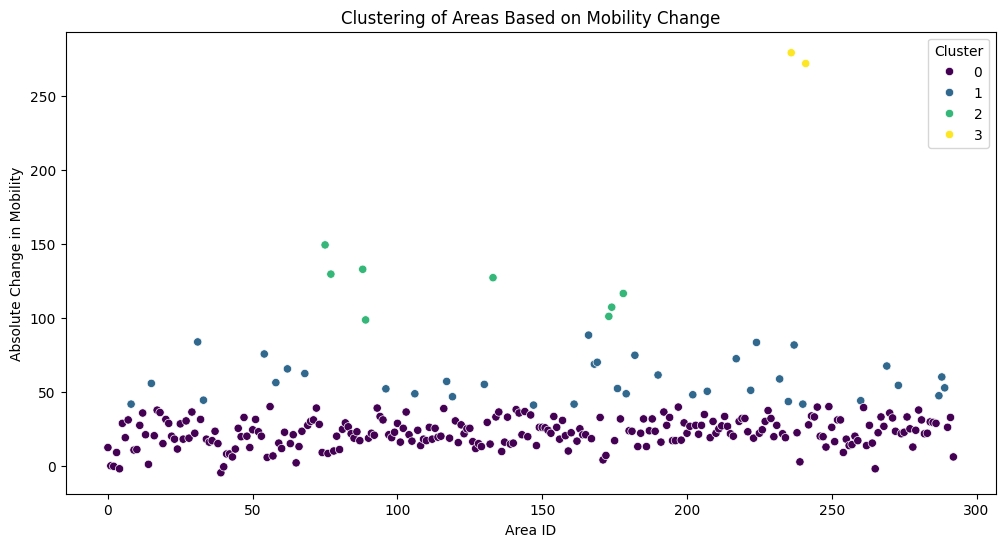

In [ ]:
from sklearn.cluster import KMeans

# Assume 'area_data' contains 'Absolute Change' values for clustering
X = area_data[['Absolute Change']]  
kmeans = KMeans(n_clusters=4, random_state=42)
area_data['Cluster'] = kmeans.fit_predict(X)


area_data_reset = area_data.reset_index()

# clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=area_data_reset.index, y=area_data_reset['Absolute Change'], hue=area_data_reset['Cluster'], palette='viridis')
plt.title('Clustering of Areas Based on Mobility Change')
plt.xlabel('Area ID')
plt.ylabel('Absolute Change in Mobility')
plt.show()



                                            Baseline: People Moving  \
area_id                                                               
(62.788086, 9.434505, 62.963867, 9.098787)                10.333333   
(62.788086, 9.434505, 63.051758, 9.098787)                12.000000   
(63.754883, 8.594076, 63.754883, 8.678289)                14.666667   
(63.754883, 8.678289, 63.754883, 8.594076)                18.666667   
(65.86426, 10.354521, 65.77637, 11.766699)                12.000000   

                                            Crisis: People Moving  \
area_id                                                             
(62.788086, 9.434505, 62.963867, 9.098787)                   10.0   
(62.788086, 9.434505, 63.051758, 9.098787)                   10.0   
(63.754883, 8.594076, 63.754883, 8.678289)                   10.0   
(63.754883, 8.678289, 63.754883, 8.594076)                   18.0   
(65.86426, 10.354521, 65.77637, 11.766699)                   10.0   

                  

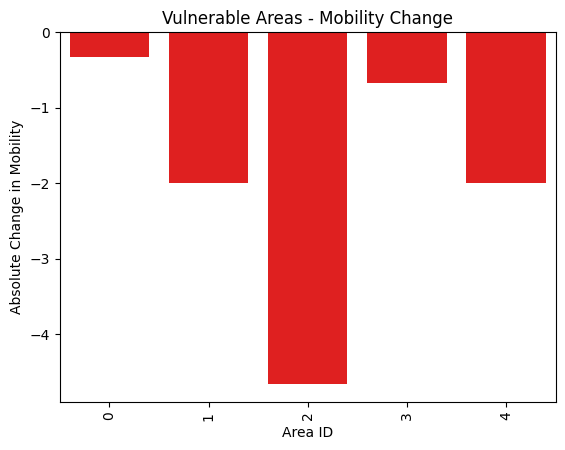

In [19]:

vulnerable_areas = area_data[area_data['Absolute Change'] < 0]  # Areas with negative change in mobility
print(vulnerable_areas)

# Reset the index of vulnerable areas
vulnerable_areas_reset = vulnerable_areas.reset_index()

# Plot vulnerable areas with minimal mobility change
sns.barplot(x=vulnerable_areas_reset.index, y=vulnerable_areas_reset['Absolute Change'], color='red')
plt.title('Vulnerable Areas - Mobility Change')
plt.xlabel('Area ID')
plt.ylabel('Absolute Change in Mobility')
plt.xticks(rotation=90)
plt.show()



In [20]:

vulnerable_areas_reset.to_csv('vulnerable_areas_reset.csv', index=False)
